### Import tools

In [99]:
import numpy as np
import pandas as pd
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

In [6]:
# !wget https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv

--2023-01-13 13:42:48--  https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv
Распознаётся gist.githubusercontent.com (gist.githubusercontent.com)… 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Подключение к gist.githubusercontent.com (gist.githubusercontent.com)|185.199.110.133|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 3975 (3,9K) [text/plain]
Сохранение в: ‘iris.csv’

iris.csv            100%[===================>]   3,88K  --.-KB/s    за 0s      

2023-01-13 13:42:48 (11,6 MB/s) - ‘iris.csv’ сохранён [3975/3975]



### Get the data

In [8]:
col_names=['sepal_length','sepal_witdth','petal_length','petal_width','type']

data=pd.read_csv('iris.csv',skiprows=1,header=None, names=col_names)
data.head(10)

,sepal_length,sepal_witdth,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [13]:
data['type']=data['type'].map({'Setosa':0,'Versicolor':1,'Virginica':2})

In [14]:
data

,sepal_length,sepal_witdth,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Node class

In [16]:
class Node():
    def __init__(self, feature_index=None, threshold = None, left = None, right = None, info_gain =None, value = None):
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        sefl.right = right
        self.info_gain = info_gain
        
        # for leaf node
        self.value = value

In [86]:
np.array(data)[:,-1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [90]:
X, Y = np.array(data)[:,:-1], np.array(data)[:,-1]

In [93]:
np.shape(X)

(150, 4)

In [94]:
    num_samples, num_features = np.shape(X)

In [95]:
num_samples

150

In [17]:
class DecisionTreeClassifier():
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''
        
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree ''' 
        
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["info_gain"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["info_gain"])
        
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf")
        
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
                    # update the best split if needed
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain
                        
        # return best split
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def information_gain(self, parent, l_child, r_child, mode="entropy"):
        ''' function to compute information gain '''
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode=="gini":
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain
    
    def entropy(self, y):
        ''' function to compute entropy '''
        
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy
    
    def gini_index(self, y):
        ''' function to compute gini index '''
        
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini
        
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        
        Y = list(Y)
        return max(Y, key=Y.count)
    
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
    
    def predict(self, X):
        ''' function to predict new dataset '''
        
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions
    
    def make_prediction(self, x, tree):
        ''' function to predict a single data point '''
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

In [32]:
from sklearn.datasets import make_classification
import seaborn as sns

In [31]:
X,y=make_classification(n_samples=100, n_features=2,n_redundant=0)

In [34]:
df

,0,1,target
0,0.876237,-0.655940,0
1,0.155745,1.940545,1
2,2.680762,-2.749066,0
3,-3.614804,-1.261388,0
4,-1.483362,0.002841,0
...,...,...,...
95,1.115751,0.581286,1
96,-1.632686,-1.638256,0
97,-0.709030,0.909844,1
98,0.455978,0.450437,0


In [25]:
df=pd.DataFrame(X)
df['target']=y

<AxesSubplot: xlabel='0', ylabel='1'>

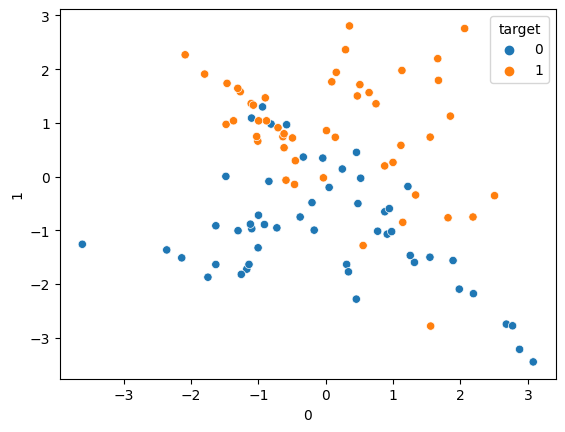

In [39]:
sns.scatterplot(data=df,x=0,y=1,hue='target')

In [ ]:
#decision nodes and leaf nodes
#we make decision nodes untin there aer only 1 leaf
# model will choose the split which maximizes the information gain, comparint all possible splits

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [61]:
!wget https://raw.githubusercontent.com/NikitaTsekh/Desktop_repositorium/main/simple_classification.csv

--2023-01-13 14:51:25--  https://raw.githubusercontent.com/NikitaTsekh/Desktop_repositorium/main/simple_classification.csv
Распознаётся raw.githubusercontent.com (raw.githubusercontent.com)… 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Подключение к raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 26176 (26K) [text/plain]
Сохранение в: ‘simple_classification.csv’

simple_classificati 100%[===================>]  25,56K  --.-KB/s    за 0,01s   

2023-01-13 14:51:25 (1,90 MB/s) - ‘simple_classification.csv’ сохранён [26176/26176]



In [78]:
path = 'simple_classification.csv'
df = pd.read_csv(path,on_bad_lines= 'skip',index_col=0)

0.9920634920634921

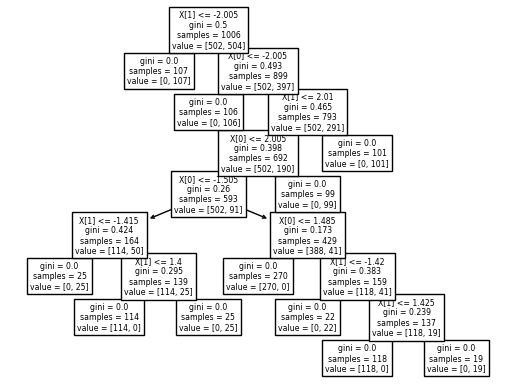

In [81]:
# train, test = train_test_split(df[['features_1','features_2','rd2','label']], test_size=0.2,random_state=12345)

train, test = train_test_split(df[['features_1','features_2','label']], test_size=0.2,random_state=12345)

features_train = train.drop(columns='label')
target_train = train['label']
features_test = test.drop(columns='label')
target_test = test['label']
lr=DecisionTreeClassifier()

lr.fit(features_train,target_train)
plot_tree(lr)
#Accuracy score
sum(lr.predict(features_test)==target_test)/len(target_test)

STAT QUEST


In [97]:
d = {'loves_popcorn': [1,1,0,0,1,1,0 ], 'loves_soda': [1,0,1,1,1,0,0],'age':[7,12,18,35,38,50,83],'loves_singing':[0,0,1,1,1,0,0]}
df = pd.DataFrame(data=d)

In [98]:
df

,loves_popcorn,loves_soda,age,loves_singing
0,1,1,7,0
1,1,0,12,0
2,0,1,18,1
3,0,1,35,1
4,1,1,38,1
5,1,0,50,0
6,0,0,83,0


1. We should decide which column use as initial decision leaf

In [115]:
df

,loves_popcorn,loves_soda,age,loves_singing
0,1,1,7,0
1,1,0,12,0
2,0,1,18,1
3,0,1,35,1
4,1,1,38,1
5,1,0,50,0
6,0,0,83,0


In [112]:
tree_1 = DecisionTreeClassifier(max_depth=1)
tree_2 = DecisionTreeClassifier(max_depth=1)
tree_3 = DecisionTreeClassifier(max_depth=1)
tree_1.fit(df[['loves_popcorn']],df[['loves_singing']])
tree_2.fit(df[['loves_soda']],df[['loves_singing']])
tree_3.fit(df[['age']],df['loves_singing'])

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'X[0] <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.25, 0.25, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.75, 0.25, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]')]

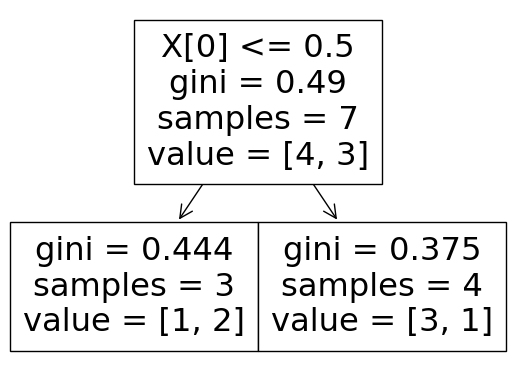

In [113]:
plot_tree(tree_1)


In [122]:
gini_impurity_1 = 3*0.444/7+(4/7)*0.375
gini_impurity_2 = 0+(4/7)*0.375
gini_impurity_3 = 0 + 5/7*0.48

In [123]:
print(gini_impurity_1)
print(gini_impurity_2)
print(gini_impurity_3)

0.4045714285714286
0.21428571428571427
0.34285714285714286


[Text(0.5, 0.75, 'X[0] <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.75, 0.25, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]')]

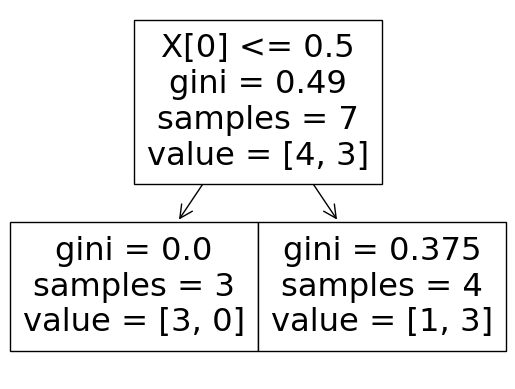

In [114]:
plot_tree(tree_2)

[Text(0.5, 0.75, 'X[0] <= 15.0\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.48\nsamples = 5\nvalue = [2, 3]')]

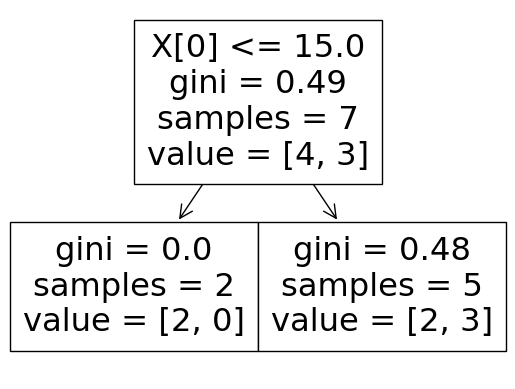

In [107]:
plot_tree(tree_3)

Gini impurity 

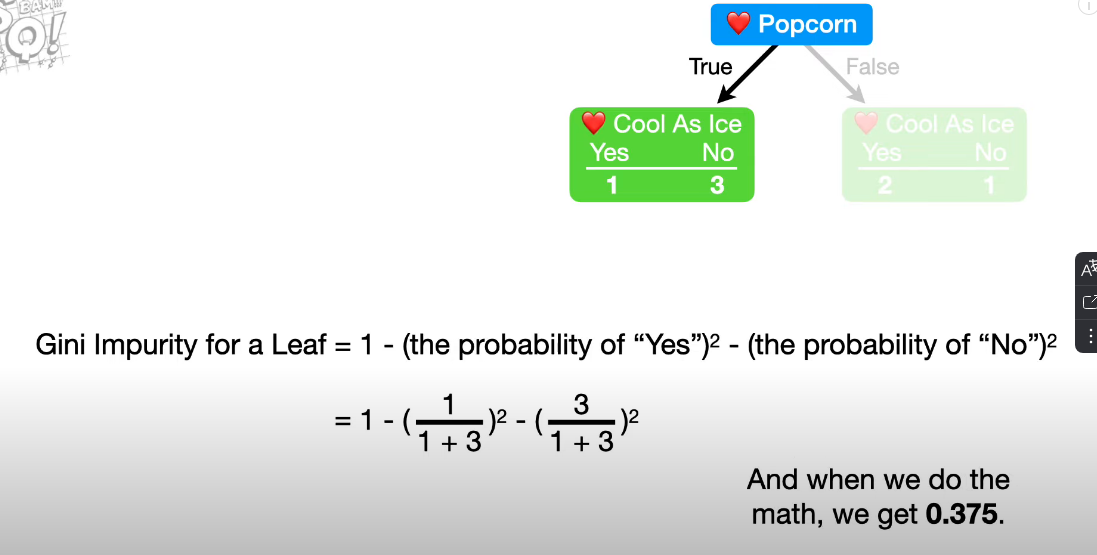

For numerical data, its more complicated:
-Sorting

-calculating averages

We choose sample with lowest impurity. Its loves_soda

[Text(0.5, 0.75, 'X[0] <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.75, 0.25, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]')]

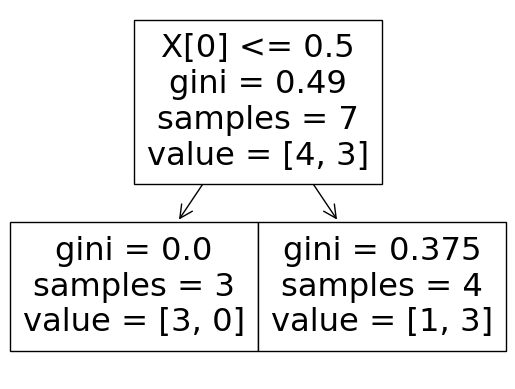

In [124]:
plot_tree(tree_2)

In a nutshell, what we do building decision classification trees:
we choose best split  with minimum gini impurity on evey step. And continue until there are no possible splits.


To prevent overfitting,we can require no less than 3 samples in one leaf. Because if there is one, we are not sure its okage

In [125]:
#Lets make first step to automatically detect which column is the best initail split.
# Lets simplify and use only categorical features first

d = {'loves_popcorn': [1,1,0,0,1,1,0 ], 'loves_soda': [1,0,1,1,1,0,0],'gender':[0,0,0,1,1,1,1],'loves_singing':[0,0,1,1,1,0,0]}
df = pd.DataFrame(data=d)

In [126]:
tree_1 = DecisionTreeClassifier(max_depth=1)
tree_2 = DecisionTreeClassifier(max_depth=1)
tree_3 = DecisionTreeClassifier(max_depth=1)
tree_1.fit(df[['loves_popcorn']],df[['loves_singing']])
tree_2.fit(df[['loves_soda']],df[['loves_singing']])
tree_3.fit(df[['gender']],df['loves_singing'])

DecisionTreeClassifier(max_depth=1)

In [129]:
tree_1.set_params()

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'X[0] <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.25, 0.25, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.75, 0.25, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]')]

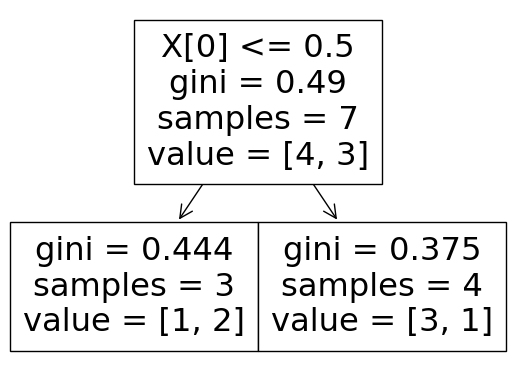

In [130]:
plot_tree(tree_1)

[Text(0.5, 0.75, 'X[0] <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.75, 0.25, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]')]

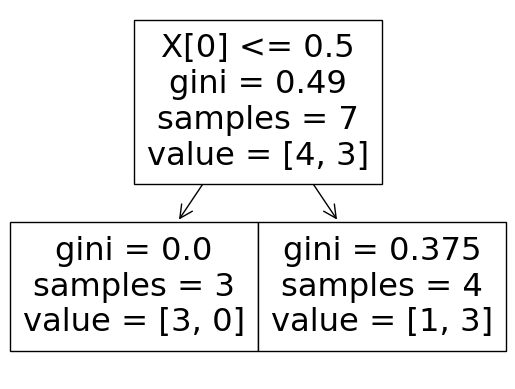

In [131]:
plot_tree(tree_2)

[Text(0.5, 0.75, 'X[0] <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.25, 0.25, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.75, 0.25, 'gini = 0.5\nsamples = 4\nvalue = [2, 2]')]

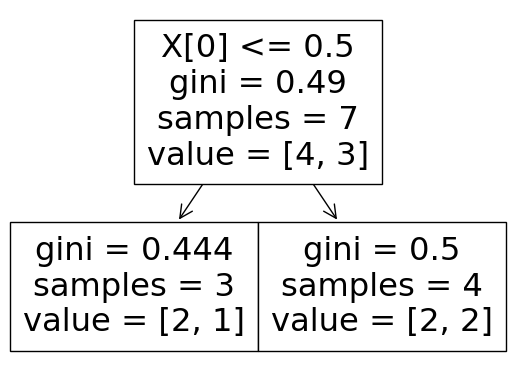

In [133]:
plot_tree(tree_3)

In [134]:
gini_impurity_1 = 3*0.444/7+(4/7)*0.375
gini_impurity_2 = 0+(4/7)*0.375
gini_impurity_3 = 3*0.444/7+ + (4/7)*0.5

In [135]:
print(gini_impurity_1)
print(gini_impurity_2)
print(gini_impurity_3)

0.4045714285714286
0.21428571428571427
0.476


Now we should automate calculation

In [152]:
col ='loves_popcorn'
target ='loves_singing'
df_=df[[col,target]].copy()

In [153]:
#now we have to count gini impurity
df_

,loves_popcorn,loves_singing
0,1,0
1,1,0
2,0,1
3,0,1
4,1,1
5,1,0
6,0,0


In [162]:
(
    df_.groupby('loves_popcorn',as_index= False).count()
    [target]
    
)

0    3
1    4
Name: loves_singing, dtype: int64

In [170]:
(
    df_.loc[lambda x:x['loves_popcorn']==0]['loves_singing'].value_counts()
)

1    2
0    1
Name: loves_singing, dtype: int64

In [184]:
var0=(
    df_.loc[lambda x:x['loves_popcorn']==0]['loves_singing'].value_counts()
    [0]
)

var1=(
    df_.loc[lambda x:x['loves_popcorn']==0]['loves_singing'].value_counts()[1]
)
var0=(
    df_.loc[lambda x:x['loves_popcorn']==0]['loves_singing'].value_counts()
    [0]
)

var1=(
    df_.loc[lambda x:x['loves_popcorn']==0]['loves_singing'].value_counts()[1]
)

var0,var1

gini0=1-((var0/((var0+var1)))**2)-((var1/((var0+var1)))**2)
print(gini0)
var0,var1

gini0=1-((var0/((var0+var1)))**2)-((var1/((var0+var1)))**gini0=1-((var0/((var0+var1)))**2)-((var1/((var0+var1)))**2)
print(gini0)
var0,var1
2)
print(gini0)

0.4444444444444444


In [186]:
var0=(
    df_.loc[lambda x:x['loves_popcorn']==1]['loves_singing'].value_counts()
    [0]
)

var1=(
    df_.loc[lambda x:x['loves_popcorn']==1]['loves_singing'].value_counts()[1]
)

var0,var1

gini1=1-((var0/((var0+var1)))**2)-((var1/((var0+var1)))**2)
print(gini1)

0.375


In [196]:
#lets calculate gini for the node

samp0=df_.loc[lambda x:x['loves_popcorn']==0]['loves_singing'].count()
samp1=df_.loc[lambda x:x['loves_popcorn']==1]['loves_singing'].count()

print(samp0,samp1)


tgimp= gini0*(samp0/(samp0+samp1))+gini1*(samp1/(samp0+samp1))
print(tgimp)

3 4
0.40476190476190477


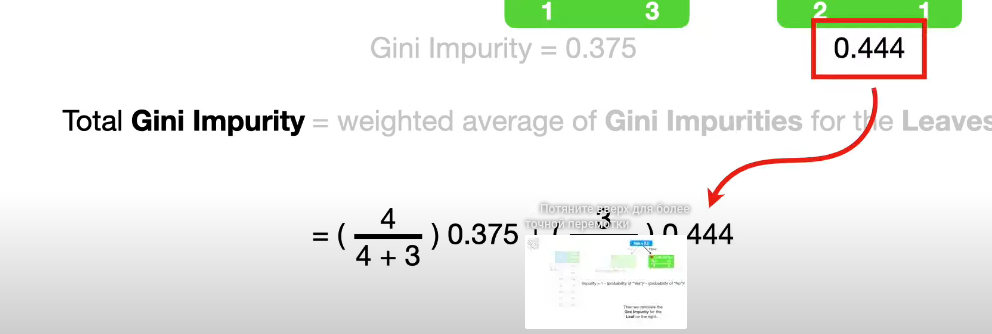

Thats great, we counted gini impurity for the first column. Lets go the upper level bro

In [206]:
col ='loves_soda'
target ='loves_singing'
df_=df[[col,target]].copy()

In [212]:
df_.loc[lambda x:x[col]==0][target].value_counts()

0    3
Name: loves_singing, dtype: int64

In [213]:
    
        df_.loc[lambda x:x[col]==0][target].value_counts()

0    3
Name: loves_singing, dtype: int64

In [218]:
try:
    var0=(
        df_.loc[lambda x:x[col]==0][target].value_counts()
        [0]
    )
except KeyError:
    var0=0
try:
    var1=(
        df_.loc[lambda x:x[col]==0][target].value_counts()[1]
    )
except KeyError:
    var1=0
    
gini0=1-((var0/((var0+var1)))**2)-((var1/((var0+var1)))**2)

try:
    var0=(
        df_.loc[lambda x:x[col]==1][target].value_counts()
        [0]
    )
except KeyError:
    var0=0
try:
    var1=(
        df_.loc[lambda x:x[col]==1][target].value_counts()[1]
    )
except KeyError:
    var1=0
    


gini1=1-((var0/((var0+var1)))**2)-((var1/((var0+var1)))**2)


samp0=df_.loc[lambda x:x[col]==0][target].count()
samp1=df_.loc[lambda x:x[col]==1][target].count()




tgimp= gini0*(samp0/(samp0+samp1))+gini1*(samp1/(samp0+samp1))

print(tgimp)

0.0


(3, 0)

In [220]:
try:
    var0=(
        df_.loc[lambda x:x[col]==1][target].value_counts()
        [0]
    )
except KeyError:
    var0=0
try:
    var1=(
        df_.loc[lambda x:x[col]==1][target].value_counts()[1]
    )
except KeyError:
    var1=0
    


gini1=1-((var0/((var0+var1)))**2)-((var1/((var0+var1)))**2)


0.375


(1, 3)

In [223]:
samp0=df_.loc[lambda x:x[col]==0][target].count()
samp1=df_.loc[lambda x:x[col]==1][target].count()

print(samp0,samp1)


tgimp= gini0*(samp0/(samp0+samp1))+gini1*(samp1/(samp0+samp1))
print(tgimp)

3 4
0.21428571428571427


In [ ]:
samp0=df_.loc[lambda x:x['loves_popcorn']==0]['soda'].count()

In [243]:
target = 'loves_singing'
column_dict={}
for col in df.columns:
    if col != target:
        print(col)
        df_=df[[col,target]].copy()
#         var0=(
#         df_.loc[lambda x:x[col]==0][target].value_counts()
#         [0]
#         )

#         var1=(
#         df_.loc[lambda x:x[col]==0][target].value_counts()[1]
#         )

#         var0,var1

#         gini0=1-((var0/((var0+var1)))**2)-((var1/((var0+var1)))**2)
#         print(gini0)
        
        try:
            var0=(
            df_.loc[lambda x:x[col]==0][target].value_counts()
            [0]
            )
        except KeyError:
            var0=0
        try:
            var1=(
                df_.loc[lambda x:x[col]==0][target].value_counts()[1]
            )
        except KeyError:
            var1=0

        gini0=1-((var0/((var0+var1)))**2)-((var1/((var0+var1)))**2)

        try:
            var0=(
                df_.loc[lambda x:x[col]==1][target].value_counts()
                [0]
            )
        except KeyError:
            var0=0
        try:
            var1=(
                df_.loc[lambda x:x[col]==1][target].value_counts()[1]
            )
        except KeyError:
            var1=0



        gini1=1-((var0/((var0+var1)))**2)-((var1/((var0+var1)))**2)


        samp0=df_.loc[lambda x:x[col]==0][target].count()
        samp1=df_.loc[lambda x:x[col]==1][target].count()




        tgimp= gini0*(samp0/(samp0+samp1))+gini1*(samp1/(samp0+samp1))
        column_dict[col]=tgimp
print(f'Minimal gini impurity and column:{min(column_dict.values())}')
print(f'Column split with min gini impurity:{min(column_dict,key=column_dict.get)}')
print()

loves_popcorn
loves_soda
gender
Minimal gini impurity and column:0.21428571428571427
Column split with min gini impurity:loves_soda



In [244]:
### so on next step we shoul go even further and start with next node

In [235]:
min(column_dict.values())

0.21428571428571427

In [229]:
min(column_dict,key=column_dict.get)

'loves_soda'

In [ ]:
gini1*(samp1/(samp0+samp1))

In [172]:

(
    df_.loc[lambda x:x['loves_popcorn']==1]['loves_singing'].value_counts()
)

0    3
1    1
Name: loves_singing, dtype: int64